In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras 

import tensorflow as tf


In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

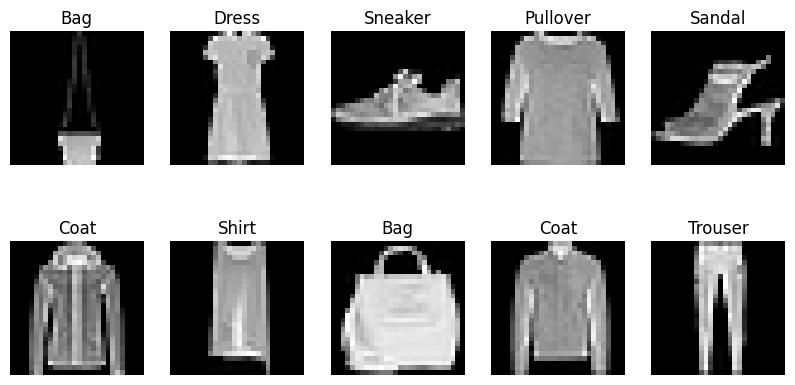

In [3]:
# Select some random images from the dataset
num_images = 10
random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)


# Visualize the images and their labels
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, index in enumerate(random_indices):
    row = i // 5
    col = i % 5
    axs[row, col].imshow(X_test[index], cmap='gray')
    axs[row, col].set_title(class_names[y_test[index]])
    axs[row, col].axis('off')
plt.show()

In [4]:
print("Training Shape: ", X_train.shape)
print("Testing Shape: ", X_test.shape)

Training Shape:  (60000, 28, 28)
Testing Shape:  (10000, 28, 28)


In [5]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


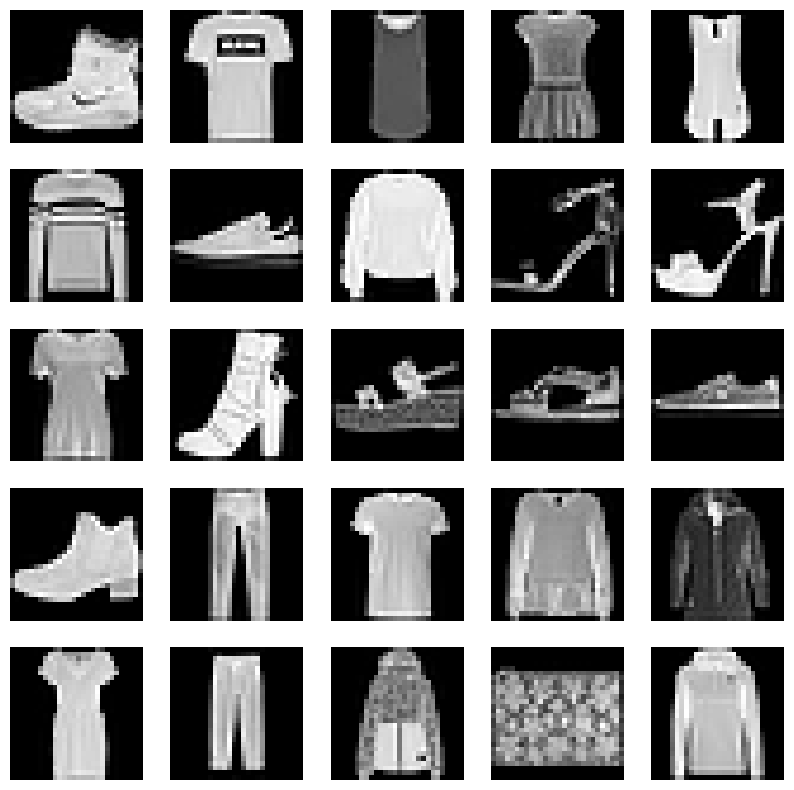

In [6]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [7]:

unique, counts = np.unique(y_train, return_counts=True)
class_dist = dict(zip(unique, counts))
print("Class distribution: \n", class_dist)

Class distribution: 
 {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


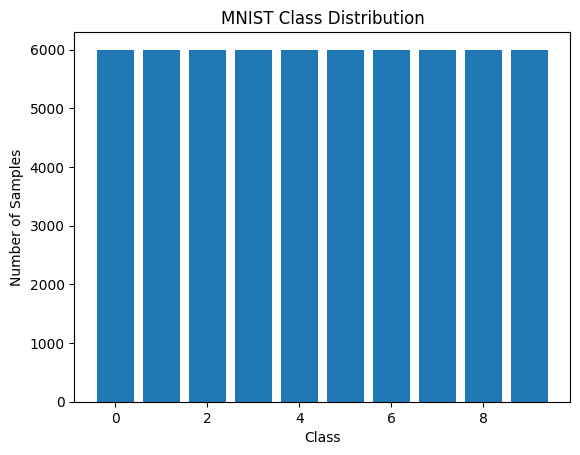

In [8]:

plt.bar(class_dist.keys(), class_dist.values())
plt.title("MNIST Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()

In [9]:
print(y_train)

[9 0 0 ... 3 0 5]


In [10]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:

X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [13]:

X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import regularizers


# Set the random seed for TensorFlow
tf.random.set_seed(42)


# Define the MLP model
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(28 * 28, ), kernel_regularizer=regularizers.l2()))
model.add(Dense(10, activation='softmax'))

In [15]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:

history = model.fit(X_train, y_train, epochs=20, batch_size=60, validation_data=(X_val, y_val))

Epoch 1/20
834/834 [==============================] - 10s 11ms/step - loss: 1.1285 - accuracy: 0.7918 - val_loss: 0.7702 - val_accuracy: 0.7912
Epoch 2/20
834/834 [==============================] - 9s 11ms/step - loss: 0.6684 - accuracy: 0.8095 - val_loss: 0.6798 - val_accuracy: 0.7859
Epoch 3/20
834/834 [==============================] - 9s 11ms/step - loss: 0.6472 - accuracy: 0.8125 - val_loss: 0.6506 - val_accuracy: 0.8117
Epoch 4/20
834/834 [==============================] - 9s 11ms/step - loss: 0.6224 - accuracy: 0.8190 - val_loss: 0.6374 - val_accuracy: 0.8045
Epoch 5/20
834/834 [==============================] - 9s 11ms/step - loss: 0.6076 - accuracy: 0.8238 - val_loss: 0.6042 - val_accuracy: 0.8264
Epoch 6/20
834/834 [==============================] - 9s 11ms/step - loss: 0.5879 - accuracy: 0.8306 - val_loss: 0.6497 - val_accuracy: 0.7962
Epoch 7/20
834/834 [==============================] - 9s 11ms/step - loss: 0.5806 - accuracy: 0.8316 - val_loss: 0.6138 - val_accuracy: 0.820

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 10)                4010      
                                                                 
Total params: 318010 (1.21 MB)
Trainable params: 318010 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


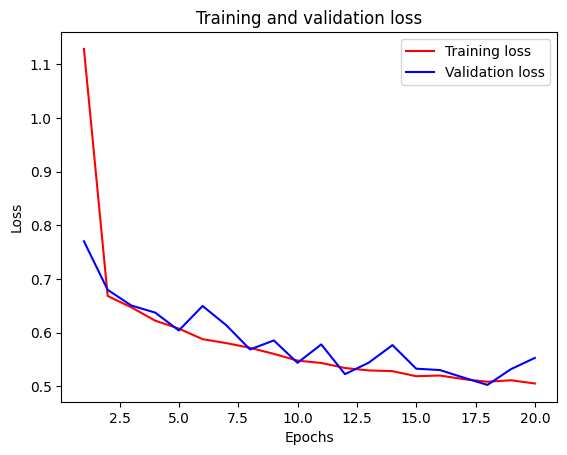

In [18]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', np.round(test_acc, decimals=3))

313/313 [==============================] - 1s 4ms/step - loss: 0.5688 - accuracy: 0.8231
Test accuracy: 0.823


313/313 [==============================] - 1s 4ms/step


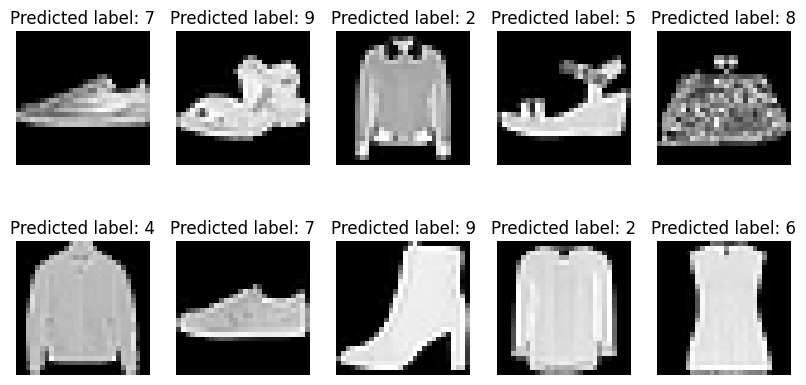

In [20]:

y_pred = model.predict(X_test)

# Convert the one-hot encoded predictions to integers
y_pred_int = np.argmax(y_pred, axis=1)

# Select some random images from the test set
num_images = 10
np.random.seed(0) # Set the random seed for numpy
random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)

# Visualize the test images and their predicted labels
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, index in enumerate(random_indices):
    row = i // 5
    col = i % 5
    axs[row, col].imshow(X_test[index].reshape(28, 28), cmap='gray')
    axs[row, col].set_title("Predicted label: %d" % y_pred_int[index])
    axs[row, col].axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

# Define a function that creates the Keras model
def create_model():
    model = Sequential()
    model.add(Dense(400, activation='relu', input_shape=(28 * 28, ), kernel_regularizer=tf.keras.regularizers.l2()))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier for use with GridSearchCV
model = KerasClassifier(model=create_model, verbose=0)

# Define hyperparameters for grid search
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
}

# Create and fit a GridSearchCV instance
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
